In [2]:
from PIL import Image
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# 全部转化为灰度图
for i in range(497,611):
    path = '2019 APMCM Problem A Attachment\\0' + str(i) + '.bmp'
    outpath = 'data\\0' + str(i) + '.bmp'
    img = cv2.imread(path) # 读取RGB彩⾊图⽚
# img = img[:,:,(2,1,0)]# 调换RGB顺序
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # RGB图转灰度图
    # plt.imshow(img_gray,cmap="gray") # 显示图⽚ 
    cv2.imwrite(outpath,img_gray)

In [7]:
# 创建图像掩膜
def makemask(img,width = 1792,heigh = 1231):
    sss=np.zeros([heigh,width],dtype=np.uint8)
    sss[200:820,500:1100]=255
    image=cv2.add(img, np.zeros(np.shape(img), dtype=np.uint8), mask=sss)
    return image

In [8]:
# 全部转化为掩膜图
for i in range(497,611):
    path = '2019 APMCM Problem A Attachment\\0' + str(i) + '.bmp'
    outpath = 'data_set\\0' + str(i) + '.bmp'
    img = cv2.imread(path) # 读取RGB彩⾊图⽚
    # img = img[:,:,(2,1,0)]# 调换RGB顺序
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # RGB图转灰度图
    # plt.imshow(img_gray,cmap="gray") # 显示图⽚
    image= makemask(img)
    cv2.imwrite(outpath,image)

In [1]:
# 图片全部删去上角标
# 图片裁剪
for i in range(497,611):
    path = '2019 APMCM Problem A Attachment\\0' + str(i) + '.bmp'
    outpath = 'data_cutted\\0' + str(i) + '.bmp'
    img = cv2.imread(path) # 读取RGB彩⾊图⽚
    img = img[200:820,500:1100]
    cv2.imwrite(outpath,image)

NameError: name 'cv2' is not defined

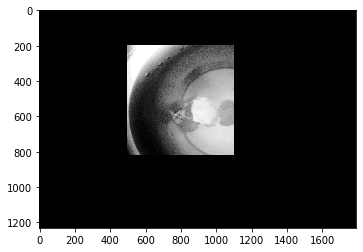

In [23]:
# Gamma变换曝光
path = 'data_set\\0' + str(497) + '.bmp'
img = cv2.imread(path) # 读取RGB彩⾊图⽚
(b, g, r) = cv2.split(img)
bH = cv2.equalizeHist(b)
gH = cv2.equalizeHist(g)
rH = cv2.equalizeHist(r)
result = cv2.merge((bH, gH, rH))
plt.imshow(result)
cv2.imwrite('output.bmp',result)


In [69]:
# 生成视频
# sss = [200:820,500:1100]
fps = 16  
size = (1792,1231) 
outpath = 'vedio.avi'
videowriter = cv2.VideoWriter(outpath,cv2.VideoWriter_fourcc('M','J','P','G'),fps,size)

def gamma(img):   
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # RGB图转灰度图
    result = cv2.equalizeHist(img)
    result = cv2.merge((result, result, result))
    return result

# 将背景图输入视频
path = 'data_set//0' + str(610) + '.bmp'
img_background = cv2.imread(path)
img_background_gamma = gamma(img)
videowriter.write(img_background)

# 将剩余帧对齐后输入视频
for i in  reversed(range(497,610)):#视频正放 (497,611):
    path = 'data_set//0' + str(i) + '.bmp'
    img = cv2.imread(path)
    img = transferimage(img,img_background)
    img = gamma(img)
    videowriter.write(img)
videowriter.release()

In [68]:
def transferimage(im2,im1):
    # Image to be aligned.  im2 = cv2.imread("align.jpg")  
    # Reference image.  im1 = cv2.imread("ref.jpg") 
    # Convert images to grayscale
    im1_gray = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
    im2_gray = cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)

    # Find size of image1
    sz = im1.shape

    # Define the motion model
    warp_mode = cv2.MOTION_TRANSLATION

    # Define 2x3 or 3x3 matrices and initialize the matrix to identity
    if warp_mode == cv2.MOTION_HOMOGRAPHY :
        warp_matrix = np.eye(3, 3, dtype=np.float32)
    else :
        warp_matrix = np.eye(2, 3, dtype=np.float32)

    # Specify the number of iterations.
    number_of_iterations = 5000;

    # Specify the threshold of the increment
    # in the correlation coefficient between two iterations
    termination_eps = 1e-10;

    # Define termination criteria
    criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)

    # Run the ECC algorithm. The results are stored in warp_matrix.
    (cc, warp_matrix) = cv2.findTransformECC (im1_gray,im2_gray,warp_matrix, warp_mode, criteria,None,3)

    if warp_mode == cv2.MOTION_HOMOGRAPHY :
        # Use warpPerspective for Homography 
        im2_aligned = cv2.warpPerspective (im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
    else :
        # Use warpAffine for Translation, Euclidean and Affine
        im2_aligned = cv2.warpAffine(im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);
    return im2_aligned

In [61]:
def transferimage2(img1_color,img2_color): # 构造仿射变换矩阵
    # Image to be aligned.  img1_color = cv2.imread("align.jpg")  
    # Reference image.  img2_color = cv2.imread("ref.jpg")    
    # Convert to grayscale. 
    img1 = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY) 
    img2 = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY) 
    height, width = img2.shape
#     # Convert to sss
#     img1 = img1[200:820,500:1100]
#     img2 = img2[200:820,500:1100]
#     imggg = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY) 
#     height, width = imggg.shape 

    # Create ORB detector with 5000 features. 
    orb_detector = cv2.ORB_create(5000) 

    # Find keypoints and descriptors. 
    # The first arg is the image, second arg is the mask 
    #  (which is not reqiured in this case). 
    kp1, d1 = orb_detector.detectAndCompute(img1, None) 
    kp2, d2 = orb_detector.detectAndCompute(img2, None) 

    # Match features between the two images. 
    # We create a Brute Force matcher with  
    # Hamming distance as measurement mode. 
    matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True) 

    # Match the two sets of descriptors. 
    matches = matcher.match(d1, d2) 

    # Sort matches on the basis of their Hamming distance. 
    matches.sort(key = lambda x: x.distance) 

    # Take the top 90 % matches forward. 
    matches = matches[:int(len(matches)*90)] 
    no_of_matches = len(matches) 

    # Define empty matrices of shape no_of_matches * 2. 
    p1 = np.zeros((no_of_matches, 2)) 
    p2 = np.zeros((no_of_matches, 2)) 

    for i in range(len(matches)): 
      p1[i, :] = kp1[matches[i].queryIdx].pt 
      p2[i, :] = kp2[matches[i].trainIdx].pt 

    # Find the homography matrix. 
    homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC) 

    # Use this matrix to transform the 
    # colored image wrt the reference image. 
    transformed_img = cv2.warpPerspective(img1_color, 
                        homography, (width, height)) 
    return transformed_img

In [70]:
# 全部转化为灰色图
for i in range(497,611):
    path = '2019 APMCM Problem A Attachment\\0' + str(i) + '.bmp'
    outpath = 'data_color\\0' + str(i) + '.bmp'
    img = cv2.imread(path) # 读取RGB彩⾊图⽚
# img = img[:,:,(2,1,0)]# 调换RGB顺序
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # RGB图转灰度图
    img = cv2.merge((img_gray,img_gray,img_gray))
    # plt.imshow(img_gray,cmap="gray") # 显示图⽚ 
    cv2.imwrite(outpath,img_gray)

In [71]:
# 生成视频
# sss = [200:820,500:1100]
fps = 16  
size = (1792,1231) 
outpath = 'vedio_gray.avi'
videowriter = cv2.VideoWriter(outpath,cv2.VideoWriter_fourcc('M','J','P','G'),fps,size)

def gamma(img):   
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # RGB图转灰度图
    result = cv2.equalizeHist(img)
    result = cv2.merge((result, result, result))
    return result

# 将背景图输入视频
path = 'data_color//0' + str(610) + '.bmp'
img_background = cv2.imread(path)
img_background_gamma = gamma(img)
videowriter.write(img_background)

# 将剩余帧对齐后输入视频
for i in  reversed(range(497,610)):#视频正放 (497,611):
    path = 'data_color//0' + str(i) + '.bmp'
    img = cv2.imread(path)
    img = transferimage(img,img_background)
    img = gamma(img)
    videowriter.write(img)
videowriter.release()

In [107]:
import  cv2
import matplotlib.pyplot as plt
#载入并显示图片
img = cv2.imread('2019 APMCM Problem A Attachment\\0497.bmp')
#灰度化
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#输出图像大小，方便根据图像大小调节minRadius和maxRadius
print(img.shape)
#霍夫变换圆检测
circles= cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,1,400,param1=50,param2=45,minRadius=450,maxRadius=550)
#输出返回值，方便查看类型
print(circles)
#输出检测到圆的个数
print(len(circles[0]))

(1231, 1792, 3)
[[[1063.5  704.5  508.7]]]
1


-------------我是条分割线-----------------
x： 1063 y: 624 r: 508


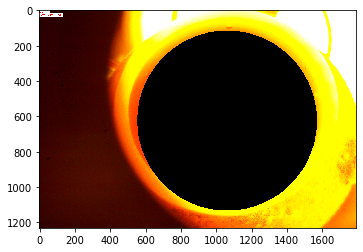

In [109]:
print('-------------我是条分割线-----------------')
#根据检测到圆的信息，画出每一个圆
for circle in circles[0]:
    #圆的基本信息
    
    #坐标行列
    x=int(circle[0])
    y=int(circle[1])-80
    #半径
    r=int(circle[2])
    print('x：',x,'y:',y,'r:',r)
    #在原图用指定颜色标记出圆的位置
    img_cil=cv2.circle(img,(x,y),r,(0,0,0),-1)
#显示新图像
'''
cv2.imshow('res',img)
#按任意键退出
cv2.waitKey(0)
cv2.destroyAllWindows()
'''
img_cil = img[:,:,(2,1,0)]# 调换RGB顺序
plt.imshow(img_cil)#,cmap="gray")
plt.savefig("ganguo.jpg")

In [ ]:
import scipy.io as scio
import pandas as pd
data = pd.DataFrame()

for i in range(497,611):
    if i not in [555,571,572,573,574]:
        print(i)
        path = 'data_mat/0'+str(i)+'.mat'
        x,y,area,length,radius = getallfigure(path)
        data_1= pd.DataFrame({'x':[x],'y':[y],'area':[area],'length':[length],'radius':[radius]})
        data = data.append(data_1)

def getXY(cnt): # 获得质心
    m = cv2.moments(cnt)  # 求得图像的矩
    # 利用矩求质心
    x = m['m10']/m['m00']
    y = m['m01']/m['m00']
    return x,y
def getallfigure(path):
    img_one = scio.loadmat(path)
    img_one = img_one['image']
    img = cv2.merge((img_one,img_one,img_one))

    thresh = img
    # 1.先找到轮廓
    # _ ,thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, hierarchy = cv2.findContours(img_one, 3, 2)
    cnt = contours[0]
    ## 质心坐标
    x,y = getXY(cnt)
    ## 轮廓面积
    area = cv2.contourArea(cnt, False)
    ## 周长
    length = cv2.arcLength(cnt, True)
    ## 最小外接圆半径
    (x,y),radius = cv2.minEnclosingCircle(cnt)
    return x,y,area,length,radius

In [104]:
img_one = scio.loadmat('data_mat/0'+str(532)+'.mat')
img_one = img_one['image']
img = cv2.merge((img_one,img_one,img_one))
thresh = img
# 1.先找到轮廓
# _ ,thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(img_one, 3, 2)
cnt = contours[0]
# 多边形的矩
m = cv2.moments(cnt)  # 求得图像的矩
print('图像的矩',m)
# 利用矩求质心
x = m['m10']/m['m00']
y = m['m01']/m['m00']
print('\nx=',x, 'y=',y)
img_h = img
# cv2.circle(img_h, (int(x),int(y)), 5, 255, 5)
# plt.imshow(img_h)
# plt.savefig("zhixin.jpg")

图像的矩 {'m00': 9406.0, 'm10': 3407293.333333333, 'm01': 3880887.1666666665, 'm20': 1243215570.0, 'm11': 1408898343.75, 'm02': 1608952461.5, 'm30': 456885139005.4, 'm21': 515215483130.7167, 'm12': 585361337591.55, 'm03': 670167132395.65, 'mu20': 8934487.778250456, 'mu11': 3059414.3004763126, 'mu02': 7710148.040715933, 'mu30': 61306893.518066406, 'mu21': 51971020.04053354, 'mu12': -1141582.559624195, 'mu03': -44157077.103759766, 'nu20': 0.10098566048284531, 'nu11': 0.03458026710567198, 'nu02': 0.08714706557746077, 'nu30': 0.0071449118409254156, 'nu21': 0.006056877704350721, 'nu12': -0.000133043876138484, 'nu03': -0.005146214478577945}

x= 362.24679282727334 y= 412.59697710681127


In [62]:
## 轮廓面积
area = cv2.contourArea(cnt, False)
## 周长
length = cv2.arcLength(cnt, True)    

7032.5

[[[446 347]]

 [[445 363]]

 [[437 385]]

 [[426 410]]

 [[419 419]]

 [[410 421]]

 [[403 421]]

 [[354 410]]

 [[351 404]]

 [[346 383]]

 [[346 368]]

 [[352 336]]

 [[353 334]]

 [[370 320]]

 [[375 318]]

 [[381 316]]

 [[390 316]]

 [[400 319]]

 [[446 341]]]


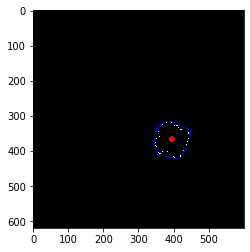

In [63]:
## 计算凸包
# 2.寻找凸包，得到凸包的角点
hull = cv2.convexHull(cnt)
print(hull)
# 3.绘制凸包
#image = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img_tu = img
img_tu = cv2.polylines(img_tu,[hull], True, (0,0,255), 2)
plt.imshow(img_tu)

外接圆半径 76


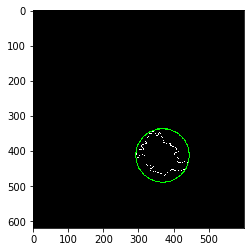

In [105]:
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
# 计算外接圆
img_cir = img
img_cir = cv2.circle(img_cir,center,radius,(0,255,0),2)
plt.imshow(img_cir)
plt.savefig("waijieyuan.jpg")
print('外接圆半径',radius)

In [93]:
data.to_csv("data.csv")
data

,x,y,area,length,radius
0,387.500000,493.000000,403.0,2995.856109,216.028458
0,506.083435,368.541779,31330.0,3262.365777,254.136887
0,446.500000,371.500000,568.5,4119.475508,290.710419
0,416.500000,367.500000,21565.0,4016.782077,307.253235
0,452.500000,366.500000,21370.5,4480.269446,291.922180
...,...,...,...,...,...
0,301.552368,580.913879,227.0,1642.052946,164.906128
0,299.500000,309.500000,187036.5,3110.403232,430.686157
0,235.500000,309.500000,194678.5,2794.094576,388.909454
0,338.167633,479.795258,4892.0,374.249780,50.822788
